In [1]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn import metrics

%matplotlib inline

## Loading the data
We can now load the dataset into pandas using the read_csv() function. This converts the CSV file into a Pandas dataframe.

In [2]:
#Read in the csv file and convert to a Pandas dataframe
df= pd.read_csv("players_data.csv")


### Viewing the dataframe
We can get a quick sense of the size of our dataset by using the shape method. This returns a tuple with the number of rows and columns in the dataset.

In [3]:
df.head(10)

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.000000,0.000000,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.000000,0.000000,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,/tom-heaton/profil/spieler/34130,Manchester United,Tom Heaton,Goalkeeper,188.0,37.0,4,0.000000,0.000000,0.000000,...,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
3,/lisandro-martinez/profil/spieler/480762,Manchester United,Lisandro Martínez,Defender Centre-Back,175.0,25.0,82,0.028090,0.056180,0.224719,...,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0
4,/raphael-varane/profil/spieler/164770,Manchester United,Raphaël Varane,Defender Centre-Back,191.0,30.0,63,0.017889,0.017889,0.053667,...,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0
5,/harry-maguire/profil/spieler/177907,Manchester United,Harry Maguire,Defender Centre-Back,194.0,30.0,68,0.037799,0.000000,0.302394,...,0.000000,0.000000,4762,148,27,1,25000000,70000000,2,0
6,/victor-lindelof/profil/spieler/184573,Manchester United,Victor Lindelöf,Defender Centre-Back,187.0,28.0,70,0.000000,0.032901,0.115153,...,0.000000,0.000000,5471,95,19,10,15000000,35000000,2,0
7,/phil-jones/profil/spieler/117996,Manchester United,Phil Jones,Defender Centre-Back,185.0,31.0,8,0.000000,0.000000,0.216346,...,0.000000,0.000000,416,932,169,7,2000000,20000000,2,0
8,/teden-mengi/profil/spieler/548470,Manchester United,Teden Mengi,Defender Centre-Back,186.0,21.0,34,0.000000,0.000000,0.130529,...,0.000000,0.000000,2758,47,13,0,2000000,2000000,2,0
9,/luke-shaw/profil/spieler/183288,Manchester United,Luke Shaw,Defender Left-Back,178.0,27.0,74,0.015374,0.169115,0.353604,...,0.000000,0.000000,5854,443,70,4,35000000,42000000,2,1


## 1. Data Profiling:
Data profiling is a comprehensive process of examining the data available in an existing dataset and collecting statistics and information about that data. 

The process of profiling differs slightly for categorical and numerical variables due to their inherent differences.

**The two main types of data are:**
- Quantitative (numerical) data
- Qualitative (categorical) data

### Data Quality Checks
Data quality checks involve the process of ensuring that the data is accurate, complete, consistent, relevant, and reliable. 


**Here are typical steps involved in checking data quality:**

#### 1. Reliability:
Evaluate the data's source and collection process to determine its trustworthiness.

In [4]:
#scraping data from Transfermarkt using Selenium and BeautifulSoup

#### 2. Timeliness: 
Ensure the data is up-to-date and reflective of the current situation or the period of interest for the analysis.

In [5]:
#on June 10, 2023

#### 3. Consistency: 

Confirm that the data is consistent within the dataset and across multiple data sources. For example, the same data point should not have different values in different places.


In [6]:
#one data set

#### 4. Relevance: 
Assess whether the data is appropriate and applicable for the intended analysis. Data that is not relevant can skew results and lead to incorrect conclusions.

**Key considerations for relevance include:**

> 1. Sample Appropriateness: Confirm that your data sample aligns with your analysis objectives. For instance, utilizing data from the Northern region will not yield accurate insights for the Western region of the Kingdom.
>
> 2. Variable Selection: Any column will not be relevant for our analysis, we can get rid of these using the drop() method. We will set the “axis” argument to 1 since we’re dealing with columns, and set the “inplace” argument to True to make the change permanent.


In [7]:
df.head()

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.000000,0.000000,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.000000,0.000000,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,/tom-heaton/profil/spieler/34130,Manchester United,Tom Heaton,Goalkeeper,188.0,37.0,4,0.000000,0.000000,0.000000,...,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
3,/lisandro-martinez/profil/spieler/480762,Manchester United,Lisandro Martínez,Defender Centre-Back,175.0,25.0,82,0.028090,0.056180,0.224719,...,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0
4,/raphael-varane/profil/spieler/164770,Manchester United,Raphaël Varane,Defender Centre-Back,191.0,30.0,63,0.017889,0.017889,0.053667,...,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0


I will delete player column as it's not needed for our analysis

In [8]:
df.drop(columns=['player'], axis=1, inplace=True)

In [9]:
df.head()

,team,name,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.000000,0.000000,0.009585,0.0,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.000000,0.000000,0.069018,0.0,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,Manchester United,Tom Heaton,Goalkeeper,188.0,37.0,4,0.000000,0.000000,0.000000,0.0,...,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
3,Manchester United,Lisandro Martínez,Defender Centre-Back,175.0,25.0,82,0.028090,0.056180,0.224719,0.0,...,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0
4,Manchester United,Raphaël Varane,Defender Centre-Back,191.0,30.0,63,0.017889,0.017889,0.053667,0.0,...,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0


#### 5. Uniqueness: 
Check for and remove duplicate records to prevent skewed analysis results.


In [10]:
df.duplicated().sum()

0

In [11]:
# go to delete duplicates columns

#### 6. Completeness: 
Ensure that no critical data is missing. This might mean checking for null values or required fields that are empty.

We will start by checking the dataset for missing or null values. For this, we can use the isna() method which returns a dataframe of boolean values indicating if a field is null or not. To group all missing values by column, we can include the sum() method.

In [12]:
#Display number missing values per column
df.isnull().sum()

team                   0
name                   0
position               0
height                 0
age                    0
appearance             0
goals                  0
assists                0
yellow cards           0
second yellow cards    0
red cards              0
goals conceded         0
clean sheets           0
minutes played         0
days_injured           0
games_injured          0
award                  0
current_value          0
highest_value          0
position_encoded       0
winger                 0
dtype: int64

In [13]:
# go to clean them 

#### 7. Check Accuracy:

Verify that the data is correct and precise. This could involve comparing data samples with known sources or using validation rules.

**The process includes:**
1. Validating the appropriateness of data types for the dataset.
2. Identifying outliers  using established validation  rule

In [14]:
# check columns types 
df.dtypes

team                    object
name                    object
position                object
height                 float64
age                    float64
appearance               int64
goals                  float64
assists                float64
yellow cards           float64
second yellow cards    float64
red cards              float64
goals conceded         float64
clean sheets           float64
minutes played           int64
days_injured             int64
games_injured            int64
award                    int64
current_value            int64
highest_value            int64
position_encoded         int64
winger                   int64
dtype: object

In [15]:
df['age']=df['age'].astype(int)

In [16]:
df.rename(columns={'minutes played':'minutes_played'}, inplace='True')

In [17]:
# check outliers 

In [18]:
# go to univariate graphical analysis
# go to lesson : data visualisation 1 - chart type section
# then go to univariate graphical analysis
# detect outliers using graphs varbaly

In [19]:
# go to lesson: statistics 1 then statistics 3
# then go to univariate Non graphical analysis
# detect outliers using numerical statistics 

In [20]:
# go to delete ouliers

### Dealing with outliers:

**How to remove Outliers?**
Most of the ways to deal with outliers are similar to the methods of missing values like deleting rows, transforming them, binning them, treat them as a separate group, imputing values and other statistical methods. Here, we will discuss the common techniques used to deal with outliers:

1. Deleting rows: We delete outlier values if it is due to data entry error, data processing error or outlier rows are very small in numbers. We can also use trimming at both ends to remove outliers.

2. Imputing: Like imputation of missing values, we can also impute outliers. We can use mean, median, mode imputation methods. Before imputing values, we should analyse if it is natural outlier or artificial. If it is artificial, we can go with imputing values. We can also use statistical model to predict values of outlier rows and after that we can impute it with predicted values.

3. Treat separately: If there are significant number of outliers, we should treat them separately in the statistical model. One of the approach is to treat both groups as two different groups and build individual model for both groups and then combine the output.


In [21]:
df.columns

Index(['team', 'name', 'position', 'height', 'age', 'appearance', 'goals',
       'assists', 'yellow cards', 'second yellow cards', 'red cards',
       'goals conceded', 'clean sheets', 'minutes_played', 'days_injured',
       'games_injured', 'award', 'current_value', 'highest_value',
       'position_encoded', 'winger'],
      dtype='object')

In [22]:
df.shape

(10754, 21)

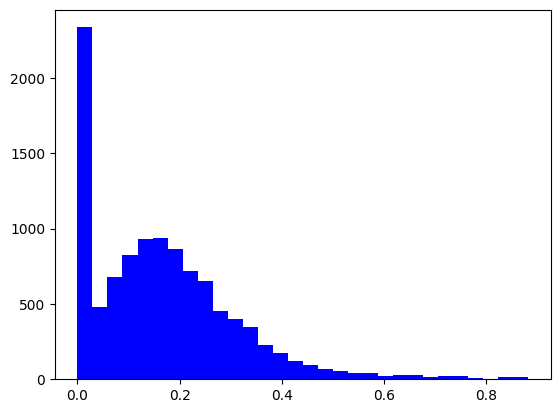

In [23]:
df=df[df['yellow cards']<0.9]
plt.hist(df['yellow cards'],
         bins=30,            
         facecolor='blue',  
        )
plt.show()

In [24]:
df.shape

(10630, 21)

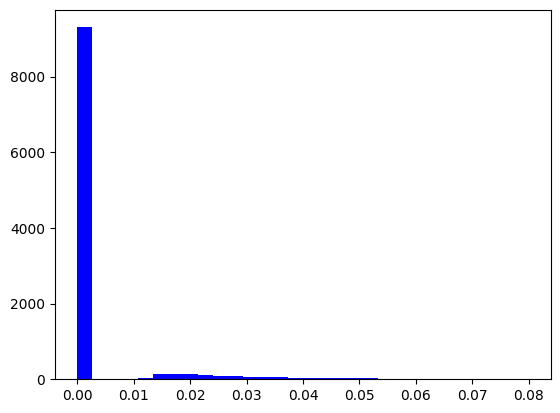

In [25]:
df= df[((df['red cards']>=0)&(df['red cards']<0.08))]
plt.hist(df['red cards'],
         bins=30,            
         facecolor='blue',  
        )
plt.show()

In [26]:
df.shape

(10518, 21)

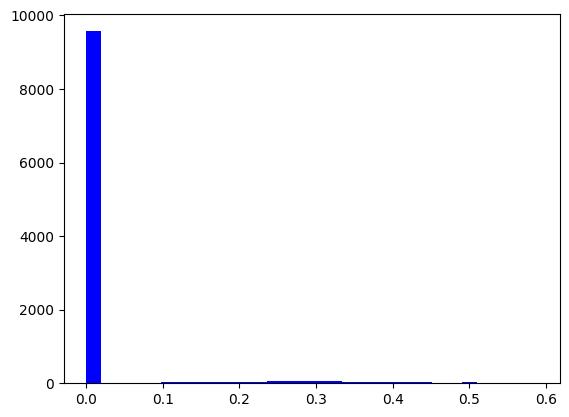

In [27]:
df= df[((df['clean sheets']>=0)&(df['clean sheets']<0.60))]

plt.hist(df['clean sheets'],
         bins=30,            
         facecolor='blue',  
        )
plt.show()

In [28]:
df.shape

(10454, 21)

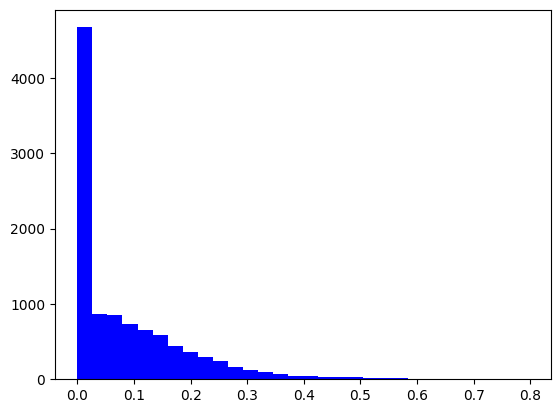

In [29]:
df=df[df['assists']<0.8]
plt.hist(df['assists'],
         bins=30,            
         facecolor='blue',  
        )
plt.show()

#### 2. Feature engineering

In [30]:
df.dtypes

team                    object
name                    object
position                object
height                 float64
age                      int64
appearance               int64
goals                  float64
assists                float64
yellow cards           float64
second yellow cards    float64
red cards              float64
goals conceded         float64
clean sheets           float64
minutes_played           int64
days_injured             int64
games_injured            int64
award                    int64
current_value            int64
highest_value            int64
position_encoded         int64
winger                   int64
dtype: object

In [31]:
df['position'].value_counts()

position
Defender Centre-Back          1776
Attack Centre-Forward         1317
Goalkeeper                    1150
midfield-CentralMidfield      1122
midfield-DefensiveMidfield     868
Defender Right-Back            854
Defender Left-Back             792
midfield-AttackingMidfield     741
Attack-RightWinger             700
Attack-LeftWinger              679
midfield-RightMidfield         101
midfield-LeftMidfield           97
midfield                        73
Attack-SecondStriker            63
Attack                          49
Defender                        33
Name: count, dtype: int64

positions may effect the value of the player,first i will replace the position to four poisitions(Goalkeeper, defender, midfielder, attacker)

In [32]:
df['position'] = np.where(df['position'].str.contains('Goalkeeper'), 'Goalkeeper',
                 np.where(df['position'].str.contains('Defender'), 'Defender',
                 np.where(df['position'].str.contains('midfield'), 'Midfielder',
                 np.where(df['position'].str.contains('Attack'), 'Attacker', df['position']))))

In [33]:
df['position'].value_counts()

position
Defender      3455
Midfielder    3002
Attacker      2808
Goalkeeper    1150
Name: count, dtype: int64

In [34]:
df.head(2)

,team,name,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,...,goals conceded,clean sheets,minutes_played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,Manchester United,David de Gea,Goalkeeper,189.0,32,104,0.0,0.0,0.009585,0.0,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,Manchester United,Jack Butland,Goalkeeper,196.0,30,15,0.0,0.0,0.069018,0.0,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0


In [35]:
df = pd.get_dummies(df, columns=['position'])

In [36]:
df.head(2)

,team,name,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,...,games_injured,award,current_value,highest_value,position_encoded,winger,position_Attacker,position_Defender,position_Goalkeeper,position_Midfielder
0,Manchester United,David de Gea,189.0,32,104,0.0,0.0,0.009585,0.0,0.0,...,5,13,15000000,70000000,1,0,False,False,True,False
1,Manchester United,Jack Butland,196.0,30,15,0.0,0.0,0.069018,0.0,0.0,...,58,1,1500000,22000000,1,0,False,False,True,False


In [37]:
df.columns

Index(['team', 'name', 'height', 'age', 'appearance', 'goals', 'assists',
       'yellow cards', 'second yellow cards', 'red cards', 'goals conceded',
       'clean sheets', 'minutes_played', 'days_injured', 'games_injured',
       'award', 'current_value', 'highest_value', 'position_encoded', 'winger',
       'position_Attacker', 'position_Defender', 'position_Goalkeeper',
       'position_Midfielder'],
      dtype='object')

In [38]:
# Calculate the 35th and 75th percentiles of the price
v35 = df['current_value'].quantile(0.35)
v75 = df['current_value'].quantile(0.75)

# Function to categorize prices
def categorize_value(value):
    if value < v35:
        return 'low_value'
    elif value < v75:
        return 'mid_value'
    else:
        return 'High_value'

# Apply the function to create a new column
df['player_value_category'] = df['current_value'].apply(categorize_value)

df.drop('current_value', axis=1, inplace=True)

# Verify the distribution of the new categories
print(df['player_value_category'].value_counts())


player_value_category
mid_value     4185
low_value     3559
High_value    2671
Name: count, dtype: int64


In [39]:
v35, v75

(450000.0, 3000000.0)

In [40]:
encoder = LabelEncoder()
df['player_value_category_encoder'] = encoder.fit_transform(df['player_value_category']) 

In [41]:
df['player_value_category_encoder'].value_counts()

player_value_category_encoder
2    4185
1    3559
0    2671
Name: count, dtype: int64

#### 3. Feature selection

In [42]:
correlation_data = df.drop(['name', 'team'], axis=1).corr(numeric_only=True)
print(correlation_data['player_value_category_encoder'].sort_values(ascending=False))

player_value_category_encoder    1.000000
age                              0.108026
goals conceded                   0.022209
winger                           0.021723
yellow cards                     0.019334
clean sheets                     0.016002
position_Goalkeeper              0.015286
position_Defender                0.013222
second yellow cards              0.006333
red cards                       -0.002570
position_Midfielder             -0.010461
position_Attacker               -0.014147
position_encoded                -0.022506
days_injured                    -0.048156
height                          -0.053400
goals                           -0.065982
games_injured                   -0.067919
assists                         -0.087948
award                           -0.137548
minutes_played                  -0.238862
appearance                      -0.244521
highest_value                   -0.416886
Name: player_value_category_encoder, dtype: float64


In [43]:
# Set the correlation threshold
threshold = 0.09  # You can change this value based on your requirement

# Filter the correlations
# We use `abs()` for absolute value to consider both strong positive and negative correlations
selected_features = correlation_data[abs(correlation_data['player_value_category_encoder']) > threshold]['player_value_category_encoder'].index
selected_features

Index(['age', 'appearance', 'minutes_played', 'award', 'highest_value',
       'player_value_category_encoder'],
      dtype='object')

In [44]:
selected_features = ['age', 'appearance', 'minutes_played', 'award', 'highest_value',
       'player_value_category_encoder']

In [45]:
df = df[selected_features]
df.head()

,age,appearance,minutes_played,award,highest_value,player_value_category_encoder
0,32,104,9390,13,70000000,0
1,30,15,1304,1,22000000,2
3,25,82,6408,9,50000000,0
4,30,63,5031,21,80000000,0
5,30,68,4762,1,70000000,0


#### 4. Prepare train and test data

In [46]:
# Prepare data
X = df.drop(['player_value_category_encoder'], axis=1)


# sacle the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [47]:
X.shape

(10415, 5)

## Buliding the Model

In [48]:
wcss = []
for i in range(1, 20):  # Test 1 to 10 clusters
    kmeans = KMeans(n_clusters=i,
                    init='k-means++',
                    max_iter=300,
                    n_init=10,
                    random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_) 

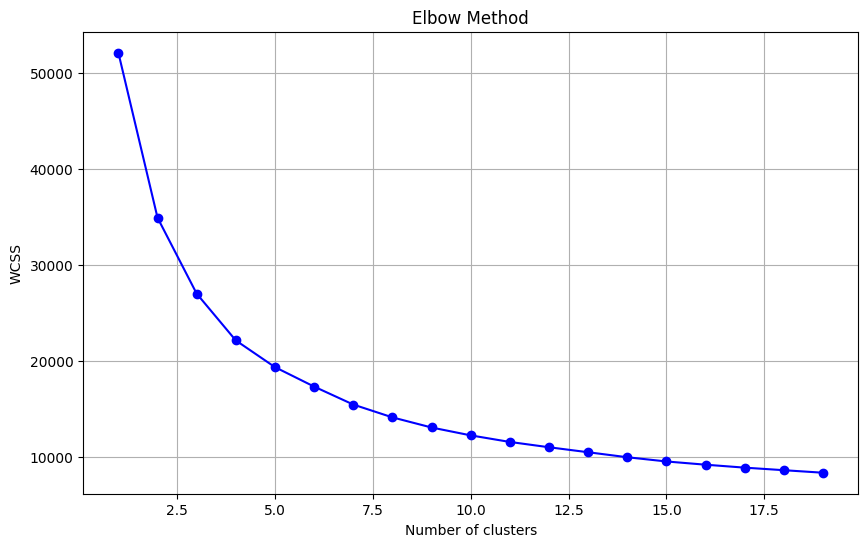

In [49]:
# 3. Plot the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 20), wcss,  marker='o', linestyle='-', color='b')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [50]:

# Optional: Apply k-Means using the optimal number of clusters
optimal_clusters = 3 # This might change based on your actual elbow curve analysis
model = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)

## Train and test the Model

In [51]:
y_pred = model.fit_predict(X_scaled)

#### Evaluating the Model


In [52]:
X.head(2)


,age,appearance,minutes_played,award,highest_value
0,32,104,9390,13,70000000
1,30,15,1304,1,22000000


In [53]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10415 entries, 0 to 10753
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             10415 non-null  int64
 1   appearance      10415 non-null  int64
 2   minutes_played  10415 non-null  int64
 3   award           10415 non-null  int64
 4   highest_value   10415 non-null  int64
dtypes: int64(5)
memory usage: 488.2 KB


In [76]:
df['highest_value'].describe()

count    1.041500e+04
mean     6.289932e+06
std      1.356197e+07
min      0.000000e+00
25%      4.500000e+05
50%      1.500000e+06
75%      5.500000e+06
max      2.000000e+08
Name: highest_value, dtype: float64

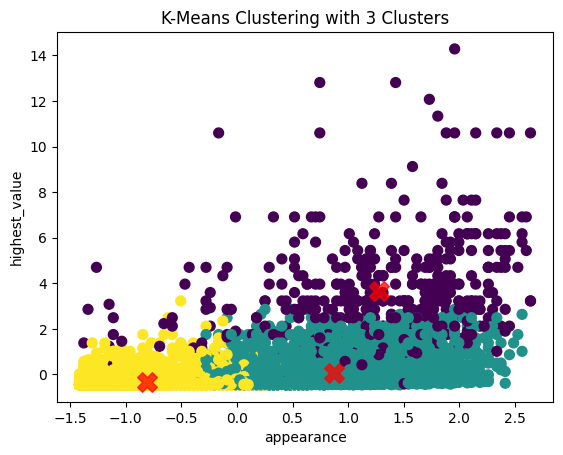

In [54]:
plt.scatter(X_scaled[:, 1], X_scaled[:, 4], c=y_pred, s=50, cmap='viridis')

centers = model.cluster_centers_
plt.scatter(centers[:, 1], centers[:, 4], c='red', s=200, alpha=0.75, marker='X')
plt.title(f'K-Means Clustering with {optimal_clusters} Clusters')
plt.xlabel('appearance')
plt.ylabel('highest_value')
plt.show()

In [55]:
X['kmeans'] = y_pred

In [56]:
X['kmeans'].value_counts()

kmeans
2    5533
1    4465
0     417
Name: count, dtype: int64

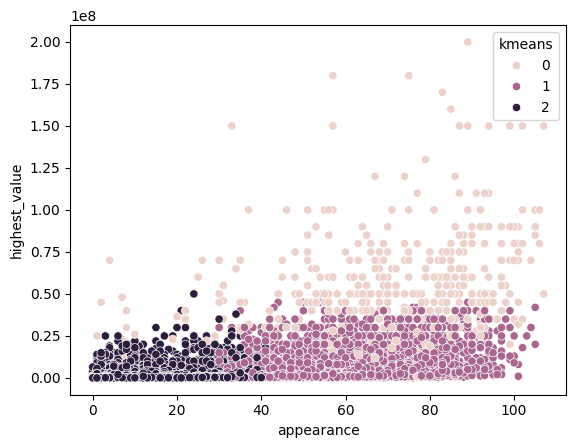

In [57]:
sns.scatterplot(data = X , x = 'appearance', y = 'highest_value', hue = 'kmeans')
plt.show()

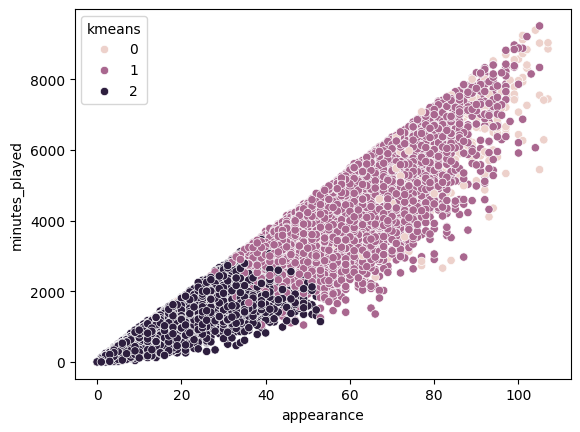

In [58]:
sns.scatterplot(data = X , x = 'appearance', y = 'minutes_played', hue = 'kmeans')
plt.show()

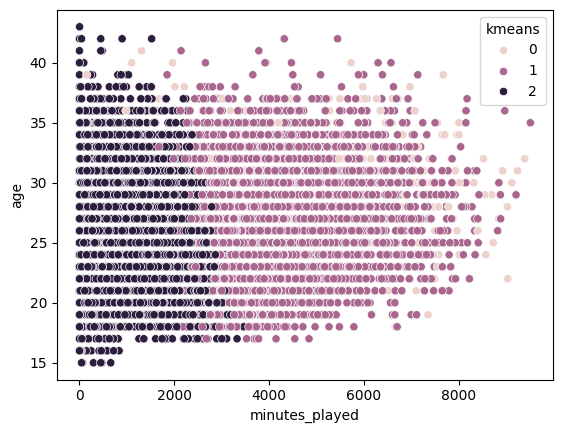

In [59]:
sns.scatterplot(data = X , x = 'minutes_played', y = 'age', hue = 'kmeans')
plt.show()

In [78]:
X[X['kmeans']==1]

,age,appearance,minutes_played,award,highest_value,kmeans
10,23,89,7132,3,22000000,1
12,24,72,5574,3,35000000,1
13,25,60,4783,1,40000000,1
15,26,76,4687,2,35000000,1
21,18,51,3512,1,800000,1
...,...,...,...,...,...,...
10734,25,42,3315,1,400000,1
10736,33,36,1676,5,30000000,1
10740,33,44,3585,1,2000000,1
10742,38,47,2806,13,5500000,1


In [60]:
import joblib
joblib.dump(model, 'knn_model.joblib')
joblib.dump(scaler, 'scaler.joblib')

['scaler.joblib']